In [1]:
import os
os.chdir(r"C:\Users\karthik\Desktop\udacity\p5\ud120-projects\final_project")

In [2]:
import sys
import pickle
sys.path.append("../tools/")
import matplotlib.pyplot as plt
from feature_format import featureFormat, targetFeatureSplit
from tester import dump_classifier_and_data
from  numpy  import *
from tester import test_classifier
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.cross_validation import train_test_split
%matplotlib inline

In [3]:
### Load the dictionary containing the dataset
with open("final_project_dataset.pkl", "r") as data_file:
    data_dict = pickle.load(data_file)
### Store to my_dataset for easy export below.
my_dataset = data_dict

## Data Exploration 

In [4]:
print "Total number of data points= {}\n".format(len (my_dataset.keys()))
print "Total number of feature for each person= {} \n" .format(len(data_dict['KOENIG MARK E'].keys()))
total_poi=[key for key,item in data_dict.items() if item["poi"]==True]
print "Total number of poi in the data_set={}\n".format(len(total_poi))
print "The Person of Interest= {}\n".format(total_poi)
print "Different featues for each person={}\n" .format(data_dict['KOENIG MARK E'].keys())
print " All the featues in the data set do not have value as there are some NaN for some instances which are need to be droped."

Total number of data points= 146

Total number of feature for each person= 21 

Total number of poi in the data_set=18

The Person of Interest= ['HANNON KEVIN P', 'COLWELL WESLEY', 'RIEKER PAULA H', 'KOPPER MICHAEL J', 'SHELBY REX', 'DELAINEY DAVID W', 'LAY KENNETH L', 'BOWEN JR RAYMOND M', 'BELDEN TIMOTHY N', 'FASTOW ANDREW S', 'CALGER CHRISTOPHER F', 'RICE KENNETH D', 'SKILLING JEFFREY K', 'YEAGER F SCOTT', 'HIRKO JOSEPH', 'KOENIG MARK E', 'CAUSEY RICHARD A', 'GLISAN JR BEN F']

Different featues for each person=['salary', 'to_messages', 'deferral_payments', 'total_payments', 'exercised_stock_options', 'bonus', 'restricted_stock', 'shared_receipt_with_poi', 'restricted_stock_deferred', 'total_stock_value', 'expenses', 'loan_advances', 'from_messages', 'other', 'from_this_person_to_poi', 'poi', 'director_fees', 'deferred_income', 'long_term_incentive', 'email_address', 'from_poi_to_this_person']

 All the featues in the data set do not have value as there are some NaN for some instanc

### Task 1: Select what features you'll use.

In [5]:
features_list = ['poi','salary',"bonus"] # You will need to use more features

## Outlier Investigation 

Person with salary values are missing= ['CORDES WILLIAM R', 'MEYER ROCKFORD G', 'HORTON STANLEY C', 'GIBBS DANA R', 'LOWRY CHARLES P', 'WALTERS GARETH W', 'CHAN RONNIE', 'BELFER ROBERT', 'WODRASKA JOHN', 'URQUHART JOHN A', 'WHALEY DAVID A', 'HAUG DAVID L', 'MENDELSOHN JOHN', 'CLINE KENNETH W', 'LEWIS RICHARD', 'HAYES ROBERT E', 'MCCARTY DANNY J', 'WAKEHAM JOHN', 'POWERS WILLIAM', 'DUNCAN JOHN H', 'LEMAISTRE CHARLES', 'PIRO JIM', 'WROBEL BRUCE', 'MEYER JEROME J', 'MCDONALD REBECCA', 'SCRIMSHAW MATTHEW', 'GATHMANN WILLIAM D', 'GILLIS JOHN', 'MORAN MICHAEL P', 'FOY JOE', 'LOCKHART EUGENE E', 'PEREIRA PAULO V. FERRAZ', 'BLAKE JR. NORMAN P', 'SHERRICK JEFFREY B', 'PRENTICE JAMES', 'THE TRAVEL AGENCY IN THE PARK', 'NOLES JAMES L', 'FOWLER PEGGY', 'CHRISTODOULOU DIOMEDES', 'JAEDICKE ROBERT', 'WINOKUR JR. HERBERT S', 'BROWN MICHAEL', 'BADUM JAMES P', 'HUGHES JAMES A', 'BHATNAGAR SANJAY', 'YEAP SOON', 'HIRKO JOSEPH', 'HAYSLETT RODERICK J', 'FUGH JOHN L', 'SAVAGE FRANK', 'GRAMM WENDY L']

The ou

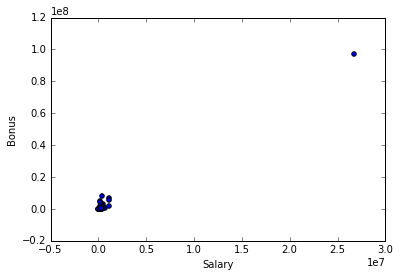

In [6]:
data = featureFormat(my_dataset, features_list)
for point in data:
    salary = point[1]  
    bonus = point[2]
    plt.scatter( salary, bonus )
plt.xlabel("Salary")
plt.ylabel("Bonus")
outlier_name=[key for key,item in data_dict.items() if item["salary"]>4000000 and item["salary"]!="NaN"]
missing_value=[key for key,item in data_dict.items() if item["salary"]=="NaN"]
print "Person with salary values are missing= {}\n".format(missing_value)
print "The outlier name= {}".format(outlier_name)


### Task 2: Remove outliers

In [7]:
#removing outlier
my_dataset.pop("TOTAL",None)
features_list = ['poi','salary',"bonus"]

## if you want to remove the NaN
#for name, features in my_dataset.items():
#    for i in range(1,len(features_list)):
#        if features[features_list[i]]=="NaN":
#            my_dataset.pop(name,None)


number of poi =  18


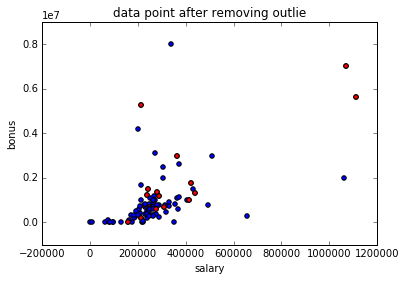

In [8]:

### Extract features and labels from dataset for local testing
data = featureFormat(my_dataset, features_list)
for point in data:
    salary = point[1]  
    bonus = point[2]
    plt.scatter( salary, bonus)
    if point[0]==1:
        plt.scatter(salary, bonus, c="r" )
        
plt.xlabel("salary")
plt.ylabel("bonus")
plt.title("data point after removing outlie")
a=[k for k,i in my_dataset.items() if i["poi"]==True]
print "number of poi = ",len(a)

# create new feature

In [9]:
my_dataset = data_dict
def fraction (total_message,message_with_poi):
    if total_message!="NaN"and message_with_poi!="NaN":
            fraction=(float(message_with_poi)/float(total_message))
    else:
         fraction=0.        
    return fraction 
new_dataset={}
for name in my_dataset:
    data_point=my_dataset[name]
    #print name
    data_point["fraction_from_poi"]=fraction(data_point["to_messages"],data_point['from_poi_to_this_person'])
    data_point["fraction_to_poi"]=fraction(data_point["from_messages"],data_point['from_this_person_to_poi'])
    #print data_point
    new_dataset[name]=data_point


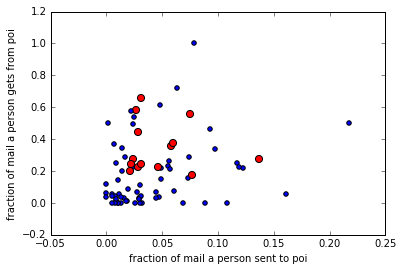

In [10]:
features_list = ['poi',"fraction_from_poi","fraction_to_poi"]
data = featureFormat(new_dataset, features_list)
for point in data:
    fraction_from_poi=point[1]
    fraction_to_poi=point[2]
    plt.scatter(fraction_from_poi,fraction_to_poi)
    if point[0]==1:
        plt.scatter(fraction_from_poi,fraction_to_poi,c="r",s=50)
plt.xlabel("fraction of mail a person sent to poi")
plt.ylabel("fraction of mail a person gets from poi")
plt.show()

### Intelligently select features

In [11]:
my_dataset=new_dataset
#print my_dataset['GLISAN JR BEN F']
features_list = ['poi','to_messages', 'deferral_payments', 'expenses', 'deferred_income', 'long_term_incentive', 
                'fraction_from_poi','restricted_stock_deferred','shared_receipt_with_poi', 'loan_advances', 'from_messages',
                  'other', 'director_fees', 'bonus','total_stock_value', 'from_poi_to_this_person','from_this_person_to_poi',
                 'restricted_stock', 'salary','fraction_to_poi', 'exercised_stock_options']
#features_list = ["poi",'salary','bonus']

data = featureFormat(my_dataset, features_list)
labels,features=targetFeatureSplit(data)
from sklearn.cross_validation import train_test_split
features_train, features_test, labels_train, labels_test =train_test_split(features, labels, test_size=0.4, random_state=42)


In [12]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
print len (features_list)
print len (labels_train)
clf=clf.fit(features_train,labels_train)
score=clf.score(features_test,labels_test)
print score
print "the feature importans\n"

importants=clf.feature_importances_
for i in  range (len(importants)):
    print "{}.  {}= {}".format (i+1,features_list[i+1],importants[i])

21
86
0.775862068966
the feature importans

1.  to_messages= 0.0
2.  deferral_payments= 0.0
3.  expenses= 0.236583011583
4.  deferred_income= 0.0
5.  long_term_incentive= 0.0
6.  fraction_from_poi= 0.0
7.  restricted_stock_deferred= 0.0830115830116
8.  shared_receipt_with_poi= 0.0713144963145
9.  loan_advances= 0.0
10.  from_messages= 0.109714609715
11.  other= 0.0
12.  director_fees= 0.0
13.  bonus= 0.232361308677
14.  total_stock_value= 0.0
15.  from_poi_to_this_person= 0.0
16.  from_this_person_to_poi= 0.0
17.  restricted_stock= 0.0
18.  salary= 0.0
19.  fraction_to_poi= 0.0982562604184
20.  exercised_stock_options= 0.168758730281


# Decision-Tree
### please run this part for generating .plk and run tester.py(finial model)

In [13]:
my_dataset=new_dataset
## Importing classifirs

from sklearn.tree import DecisionTreeClassifier
from sklearn.grid_search import GridSearchCV 

## features selection 
features_list=["poi","other", "expenses","fraction_to_poi",'shared_receipt_with_poi',"exercised_stock_options"]
data = featureFormat(my_dataset, features_list)
labels,features=targetFeatureSplit(data)
features_train, features_test, labels_train, labels_test =train_test_split(features, labels, test_size=0.4, random_state=42)

## applying classifier
parameters={"criterion":("gini","entropy"),"min_samples_split":[1,2,3,4],"max_features":(None,"auto","log2")}
dec_tree = DecisionTreeClassifier()
clf=GridSearchCV(dec_tree,parameters,cv=6,scoring="precision")
clf.fit(features_train,labels_train)
clf = clf.best_estimator_
score=clf.score(features_test,labels_test)
pre=clf.predict(features_test)
print "score= {}".format (score)
print "precision= {}".format (precision_score(labels_test,pre))
print "recall_score= {}".format(recall_score(labels_test,pre))

dump_classifier_and_data(clf, my_dataset, features_list)
test_classifier(clf, my_dataset, features_list)

score= 0.892857142857
precision= 0.571428571429
recall_score= 0.571428571429
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features='log2', max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=1, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')
	Accuracy: 0.84114	Precision: 0.44062	Recall: 0.41550	F1: 0.42769	F2: 0.42029
	Total predictions: 14000	True positives:  831	False positives: 1055	False negatives: 1169	True negatives: 10945



C:\Users\karthik\Anaconda2\lib\site-packages\sklearn\metrics\classification.py:1074: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


# PCA (illustration for overfitting )

In [14]:
print "Total number of data points= {}\n".format(len (my_dataset.keys()))
print "Total number of feature for each person= {} \n" .format(len(data_dict['KOENIG MARK E'].keys()))
total_poi=[key for key,item in data_dict.items() if item["poi"]==True]
print "Total number of poi in the data_set={}\n".format(len(total_poi))
print "The Person of Interest= {}\n".format(total_poi)
print "Different featues for each person={}\n" .format(data_dict['KOENIG MARK E'].keys())
print " All the featues in the data set do not have value as there are some NaN for some instances which are need to be droped."

Total number of data points= 145

Total number of feature for each person= 23 

Total number of poi in the data_set=18

The Person of Interest= ['HANNON KEVIN P', 'COLWELL WESLEY', 'RIEKER PAULA H', 'KOPPER MICHAEL J', 'SHELBY REX', 'DELAINEY DAVID W', 'LAY KENNETH L', 'BOWEN JR RAYMOND M', 'BELDEN TIMOTHY N', 'FASTOW ANDREW S', 'CALGER CHRISTOPHER F', 'RICE KENNETH D', 'SKILLING JEFFREY K', 'YEAGER F SCOTT', 'HIRKO JOSEPH', 'KOENIG MARK E', 'CAUSEY RICHARD A', 'GLISAN JR BEN F']

Different featues for each person=['to_messages', 'deferral_payments', 'expenses', 'poi', 'deferred_income', 'email_address', 'long_term_incentive', 'fraction_from_poi', 'restricted_stock_deferred', 'shared_receipt_with_poi', 'loan_advances', 'from_messages', 'other', 'director_fees', 'bonus', 'total_stock_value', 'from_poi_to_this_person', 'from_this_person_to_poi', 'restricted_stock', 'salary', 'total_payments', 'fraction_to_poi', 'exercised_stock_options']

 All the featues in the data set do not have valu

In [15]:
my_dataset=new_dataset  
## feature selection
features_list = ['poi','to_messages', 'deferral_payments', 'expenses', 'deferred_income', 'long_term_incentive', 
                'fraction_from_poi','restricted_stock_deferred','shared_receipt_with_poi', 'loan_advances', 'from_messages',
                  'other', 'director_fees', 'bonus','total_stock_value', 'from_poi_to_this_person','from_this_person_to_poi',
                 'restricted_stock', 'salary','fraction_to_poi', 'exercised_stock_options']
data = featureFormat(my_dataset, features_list)
labels,features=targetFeatureSplit(data)
features_train, features_test, labels_train, labels_test =train_test_split(features, labels, test_size=0.4, random_state=42)

## PCA
from sklearn.decomposition import PCA
#print labels_train.shape
n_components="mle"
std_scale =StandardScaler().fit(features_train)
features_train_norm=std_scale.transform(features_train)
features_test_norm=std_scale.transform(features_test)
pca=PCA(n_components)
pca.fit(features_train)
features_train_pca=pca.transform(features_train_norm)
features_test_pca=pca.transform(features_test_norm)

parameters= {
         'C': [1e3, 5e3, 1e4, 5e4, 1e5],
          'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1],
          }

from sklearn.svm import SVC 
scv=SVC()
clf=GridSearchCV(scv,parameters,cv=5,scoring="precision")

clf.fit(features_train_pca,labels_train)
y_pred = clf.predict(features_test_pca)

#l=["non-poi","poi"]
#print "classification_report\n"
#print classification_report(labels_test, y_pred,target_names=l)
#print "confusion_matrix\n"
#print confusion_matrix(labels_test, y_pred)
print "precision= {}".format (precision_score(labels_test,y_pred))
print "recall_score= {}".format(recall_score(labels_test,y_pred))
print "best_parameter", clf.best_estimator_

precision= 0.6
recall_score= 0.5
best_parameter SVC(C=1000.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.0001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


0
1


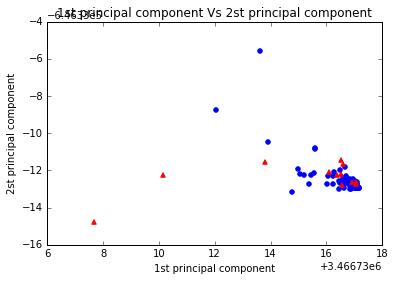

In [16]:
from matplotlib import pyplot as plt
for l,c,m in zip(range(0,2),("blue","red"),("o","^")):
    print l
    plt.scatter(features_train_pca[array(labels_train)==l,0],features_train_pca[array(labels_train)==l,1],
                color=c,marker=m,)

plt.title('1st PC Vs 2st PC')
plt.xlabel('1st principal component')
plt.ylabel('2st principal component')
plt.show()

# RANDOM FOREST

In [17]:
my_dataset=new_dataset
data = featureFormat(my_dataset, features_list)
features_list=["poi", "expenses","fraction_to_poi",'shared_receipt_with_poi',"exercised_stock_options"]
labels,features=targetFeatureSplit(data)
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import cross_val_score
std_scale =StandardScaler().fit(features)
features_train_norm=std_scale.transform(features)
clf1=RandomForestClassifier()
clf1.fit(features,labels)
#score= cross_val_score(clf1,features_train_norm,labels,cv=3,scoring="precision")
test_classifier(clf1 , my_dataset, features_list)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
	Accuracy: 0.85421	Precision: 0.47923	Recall: 0.23650	F1: 0.31671	F2: 0.26316
	Total predictions: 14000	True positives:  473	False positives:  514	False negatives: 1527	True negatives: 11486



# Voting classifier

In [18]:
#from sklearn.naive_bayes import GaussianNB
#from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.cross_validation import train_test_split
from sklearn import preprocessing
from sklearn.ensemble import VotingClassifier
from sklearn.cross_validation import cross_val_score
from mlxtend.classifier import EnsembleVoteClassifier
from sklearn.tree import DecisionTreeClassifier
my_dataset=new_dataset  
features_list=["poi","expenses","fraction_to_poi",'shared_receipt_with_poi',"exercised_stock_options"]
data = featureFormat(my_dataset, features_list)
labels,features=targetFeatureSplit(data)
#features_train, features_test, labels_train, labels_test =train_test_split(features, labels, test_size=0.4, random_state=42)
std_scale = preprocessing.StandardScaler().fit(features)
features_train_norm=std_scale.transform(features)
clf3=RandomForestClassifier(random_state=40)
clf4=DecisionTreeClassifier(random_state=40)
eclf1=VotingClassifier(estimators=[("rf",clf3),("dt",clf4)],
                      voting="soft")
eclf1=eclf1.fit(features_train_norm,labels)
test_classifier(eclf1 , my_dataset, features_list)

VotingClassifier(estimators=[('rf', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            o...plit=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=40, splitter='best'))],
         voting='soft', weights=None)
	Accuracy: 0.83436	Precision: 0.40601	Recall: 0.34450	F1: 0.37273	F2: 0.35526
	Total predictions: 14000	True positives:  689	False positives: 1008	False negatives: 1311	True negatives: 10992

